In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**EDA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder


In [17]:
ld=LabelEncoder()
data['ShelveLoc']=ld.fit_transform(data['ShelveLoc'])
data['Urban']=ld.fit_transform(data['Urban'])
data['US']=ld.fit_transform(data['US'])

In [46]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


We need to convert sales into categorical variable. So we will take mean as threshold which is equal to 7.49

In [48]:
sales=[]
for val in data['Sales']:
  if val > 7.49:
    sales.append('high')
  else:
    sales.append('low')
data['sales1']=sales

In [49]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


DIVIDING X AND Y

In [50]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

**BUILDING MODEL USING ENTROPY**

In [53]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [58]:
y_pred=model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        high       0.57      0.65      0.61        31
         low       0.76      0.69      0.72        49

    accuracy                           0.68        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.68      0.68      0.68        80



In [56]:
model.score(x_test,y_test)

0.675

Text(0.5, 1.0, 'Decision tree using Entropy')

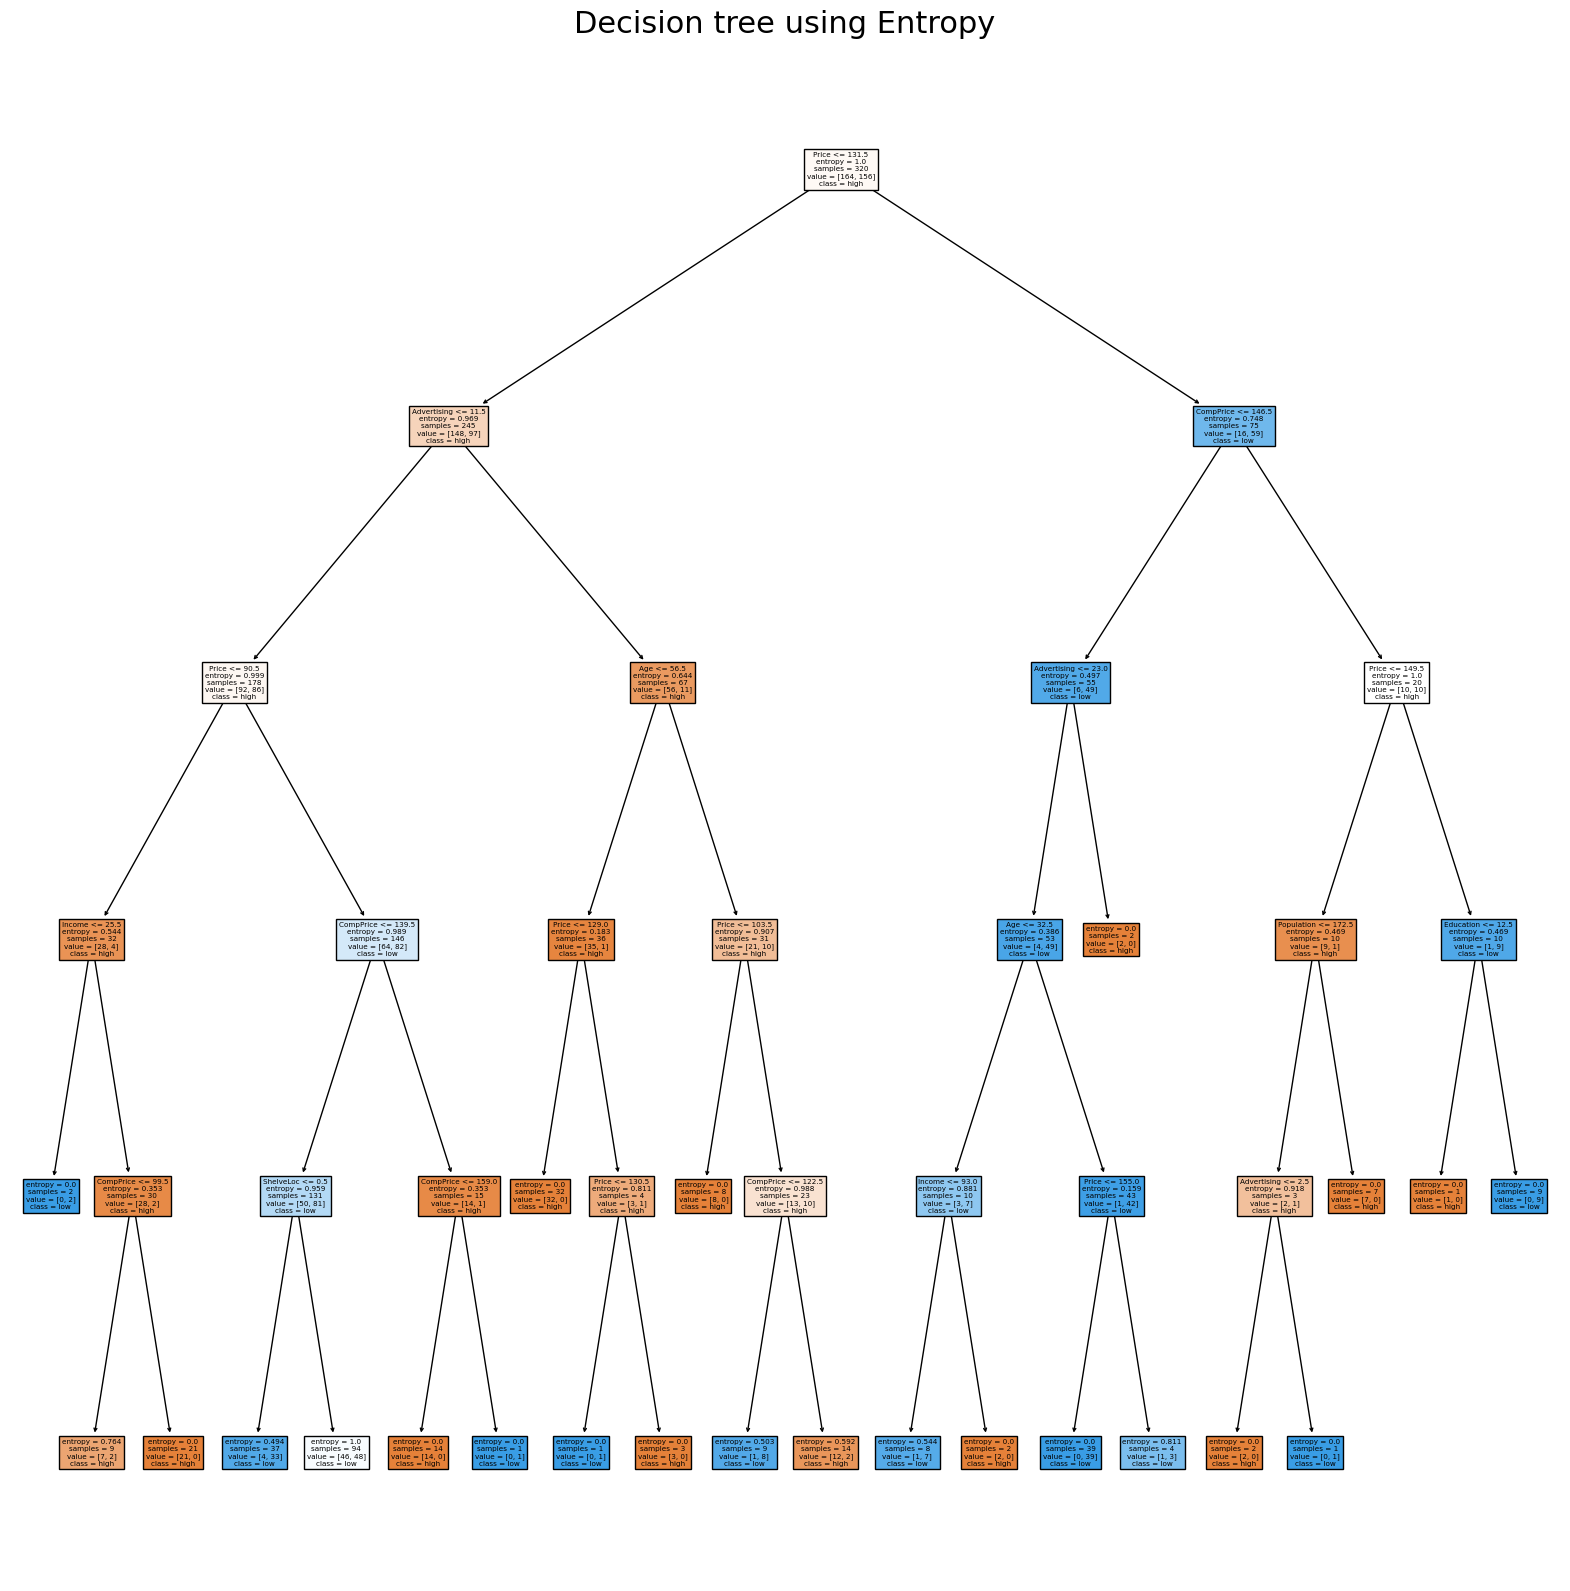

In [67]:
fig = plt.figure(figsize=(20,20))
fig=tree.plot_tree(model,feature_names=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
                                     'Urban', 'US'],class_names=['high','low'],filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

**BUILDIND DECISION TREE USING GINI CRITERIA**

In [63]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
preds=model.predict(x_test)

In [66]:
print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds
))

0.675
              precision    recall  f1-score   support

        high       0.65      0.57      0.61        35
         low       0.69      0.76      0.72        45

    accuracy                           0.68        80
   macro avg       0.67      0.66      0.66        80
weighted avg       0.67      0.68      0.67        80



Text(0.5, 1.0, 'Decision tree using GINI Criterion')

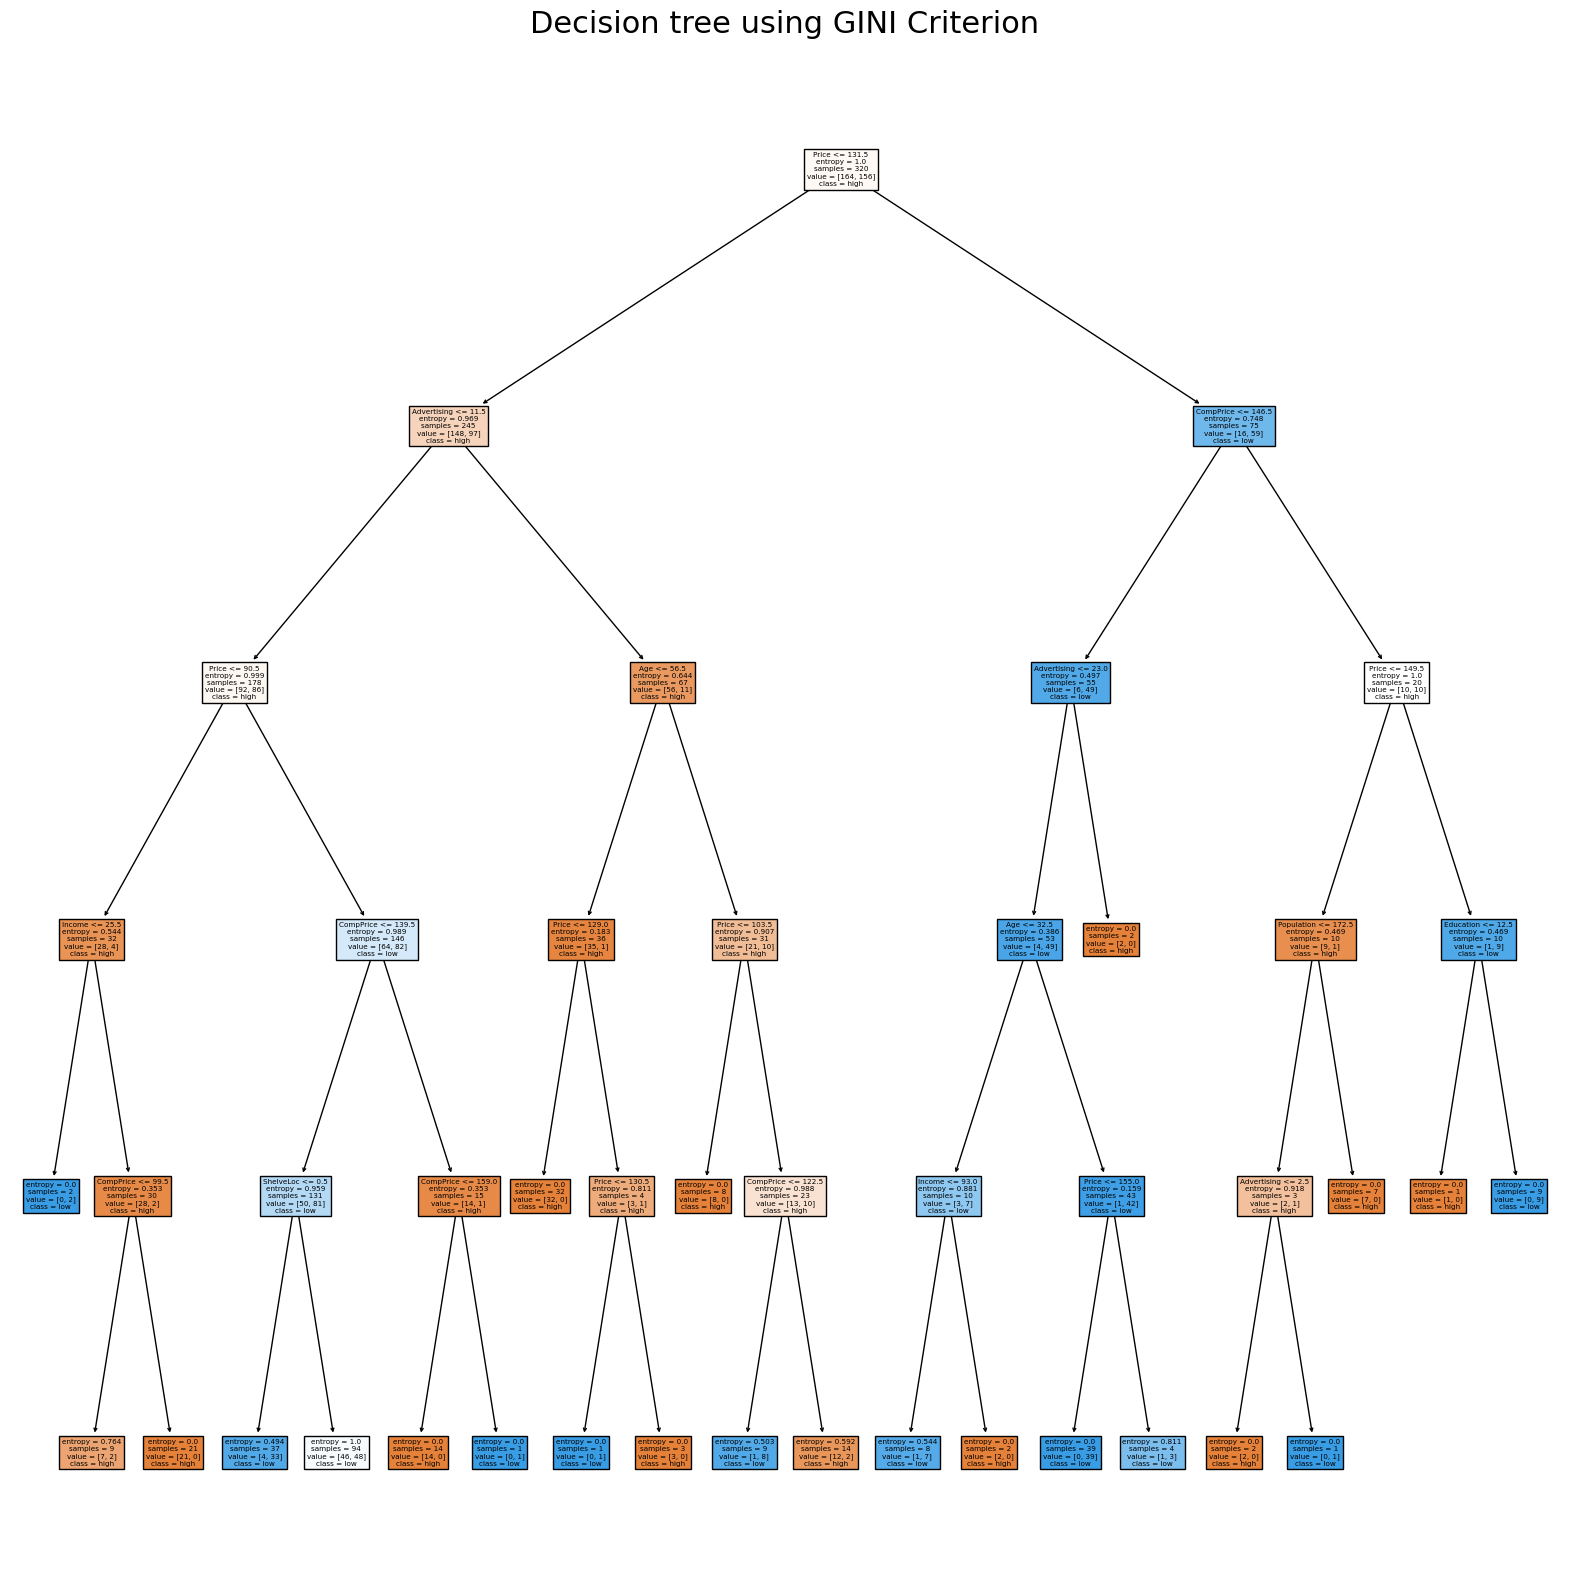

In [68]:
fig = plt.figure(figsize=(20,20))
fig=tree.plot_tree(model,feature_names=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
                                     'Urban', 'US'],class_names=['high','low'],filled=True)
plt.title('Decision tree using GINI Criterion',fontsize=22)

**hence from the both of the tree's we can understand that the most immportant constraints of the given data are price ,advertising and comp price that are effecting sales**